# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv').drop(columns=['uid'])
df

,num_commits,pageviews,AVG(diff)
0,62,28.0,NaN
1,62,28.0,NaN
2,62,28.0,NaN
3,62,28.0,NaN
4,62,28.0,NaN
...,...,...,...
72,128,NaN,-104.75
73,40,NaN,-175.60
74,15,NaN,-62.60
75,8,NaN,-115.50


In [3]:
df.fillna(0,inplace=True)
df

,num_commits,pageviews,AVG(diff)
0,62,28.0,0.00
1,62,28.0,0.00
2,62,28.0,0.00
3,62,28.0,0.00
4,62,28.0,0.00
...,...,...,...
72,128,0.0,-104.75
73,40,0.0,-175.60
74,15,0.0,-62.60
75,8,0.0,-115.50


In [4]:
y = df['AVG(diff)']
X=df.drop(columns=['AVG(diff)'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
def crossval(n_splits, X, y, model):
	kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
	l_rmse=list()
	for ind_train,ind_test in kf.split(X):
		t_X_train, t_X_test = X.iloc[ind_train], X.iloc[ind_test]
		t_y_train, t_y_test = y.iloc[ind_train], y.iloc[ind_test]
		
		model.fit(t_X_train, t_y_train)
		t_y_pred_train = model.predict(t_X_train)
		t_y_pred_test = model.predict(t_X_test)

		t_rmse_train = root_mean_squared_error(t_y_train, t_y_pred_train)
		t_rmse_test = root_mean_squared_error(t_y_test, t_y_pred_test)

		l_rmse.append(t_rmse_test)

		print(f"train -  {t_rmse_train}   |   test -  {t_rmse_test}")
	print(f"Average RMSE on crossval is {np.mean(l_rmse)}")

		

In [7]:
model_liner = LinearRegression(fit_intercept=True)
crossval(10, X, y, model_liner)

train -  42.27291015233797   |   test -  70.43979397280242
train -  47.45726648237968   |   test -  30.657394014354043
train -  47.77854388604299   |   test -  27.137319378269105
train -  46.2441901620785   |   test -  44.123072052096376
train -  46.39355004742244   |   test -  42.420391728163665
train -  47.71541914802497   |   test -  28.273391654514054
train -  46.308918660456506   |   test -  45.67313727400561
train -  47.81194647242181   |   test -  20.57247658092342
train -  44.12915324532897   |   test -  63.14957718941947
train -  42.350893141368886   |   test -  74.15893330081012
Average RMSE on crossval is 44.66054871453583


In [8]:
model_tree = DecisionTreeRegressor(random_state=21, max_depth=8)
crossval(10,X,y,model_tree)

train -  0.0   |   test -  71.88489835223467
train -  0.0   |   test -  25.24371208835975
train -  0.0   |   test -  0.0
train -  0.0   |   test -  20.293964620053917
train -  0.0   |   test -  72.20506003352149
train -  0.0   |   test -  28.991378028648448
train -  0.0   |   test -  7.0364255643204405
train -  0.0   |   test -  8.126236169698386
train -  0.0   |   test -  86.63649383194165
train -  0.0   |   test -  65.93049851867218
Average RMSE on crossval is 38.634866720745094


In [9]:
model_forest = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=21)
crossval(10,X,y,model_forest)

train -  17.103675629871862   |   test -  54.67206534956531
train -  19.023141498089963   |   test -  8.477431226276718
train -  19.754390877731687   |   test -  0.0
train -  19.142110543865996   |   test -  28.45335226395663
train -  17.594611536132938   |   test -  48.294007038219206
train -  18.789399151483014   |   test -  33.546524557713134
train -  20.00984227635604   |   test -  18.16921076861153
train -  19.17248526907595   |   test -  26.455453054282096
train -  14.783610134802732   |   test -  67.80311223922031
train -  17.868540799234964   |   test -  42.86743366475046
Average RMSE on crossval is 32.873859016259544


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [10]:
model_liner.fit(X_train, y_train)
y_pred_liner = model_liner.predict(X_test)
y_pred_liner

array([-27.15893204, -38.51261441, -33.59771207, -36.13990293,
       -23.94195387,  -6.99709369, -25.80407191, -41.05495923,
       -25.80407191, -27.83541276, -25.80407191,  -6.99709369,
        -7.84418275, -19.70122303, -29.70019922, -29.70019922])

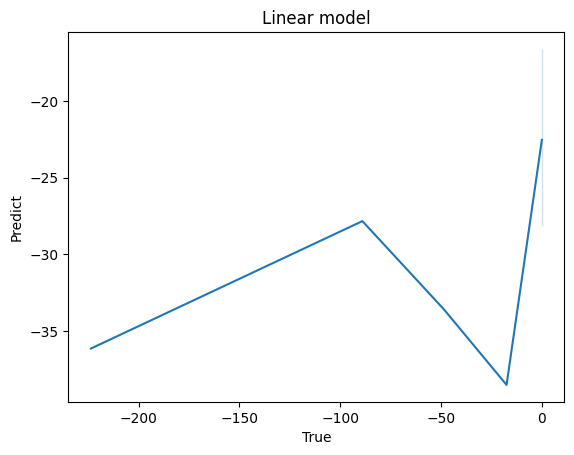

In [11]:
sns.lineplot(x=y_test, y=y_pred_liner)
plt.xlabel("True")
plt.ylabel("Predict")
plt.title("Linear model")
plt.show()

In [12]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
y_pred_tree

array([   0.        ,   -5.33333333, -157.4       ,  -52.33333333,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -160.4       ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

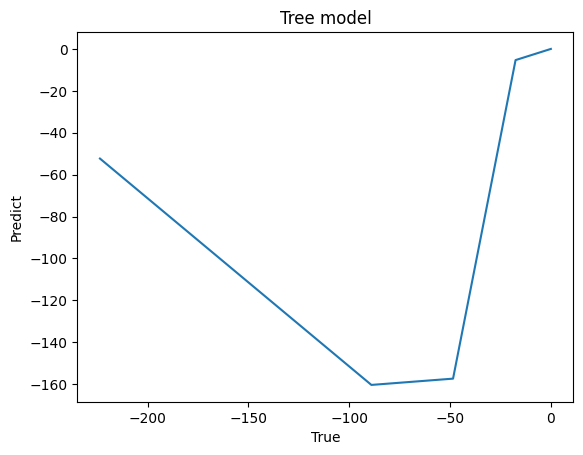

In [13]:
sns.lineplot(x=y_test, y=y_pred_tree)
plt.xlabel("True")
plt.ylabel("Predict")
plt.title("Tree model")
plt.show()

In [14]:
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)
y_pred_forest

array([   0.        ,  -49.20193614, -115.02482821,  -80.8974917 ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -116.65107778,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

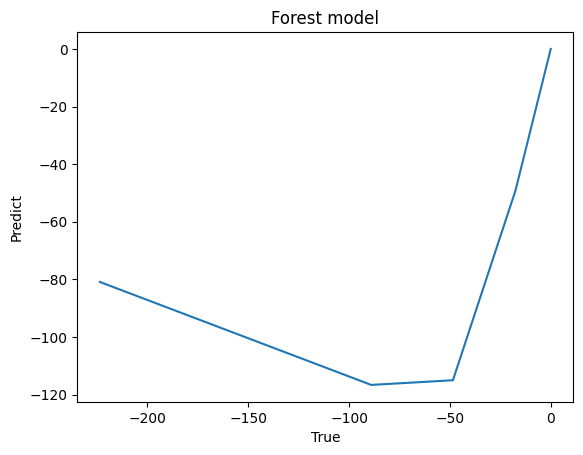

In [15]:
sns.lineplot(x=y_test, y=y_pred_forest)
plt.xlabel("True")
plt.ylabel("Predict")
plt.title("Forest model")
plt.show()

В идеале прямая прошла бы по диагонали